$s$

In [215]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/slider_cranck
    out.clear_output()


In [216]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [217]:
m.model_tree()

In [220]:
m.points

hps_B    ([200.0], [0.0], [20.0])
hps_C    ([220.0], [0.0], [20.0])
hps_O       ([0.0], [0.0], [0.0])
dtype: object

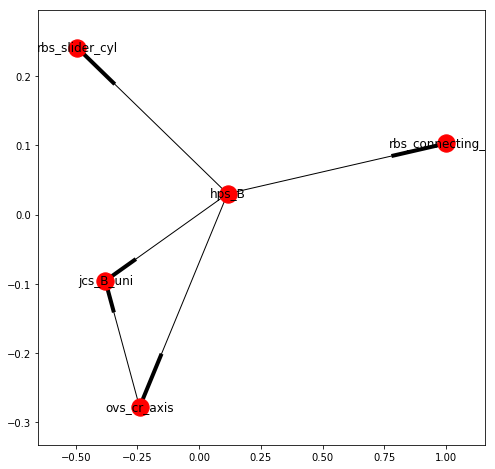

In [96]:
node='hps_B'
g = m.data_graph.subgraph(list(m.data_graph.successors(node))+[node])
fig = plt.figure(figsize=(8,8))
layout = nx.circular_layout(g)
nx.draw_networkx(g,with_labels=True)
#nx.draw_networkx(g)#,with_labels=True,pos=layout)
plt.show()

In [112]:
g=m.data_graph.copy()

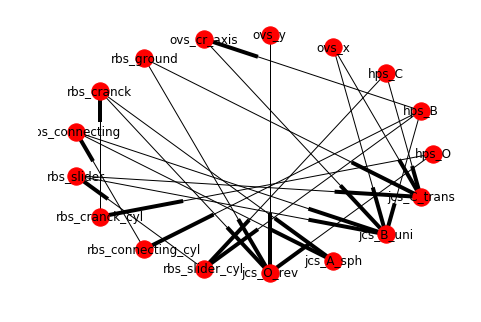

In [125]:
nx.draw_circular(g,with_labels=True)
plt.show()

In [136]:
g.add_edges_from([('Geometries',i) for i in m.geometries.index])

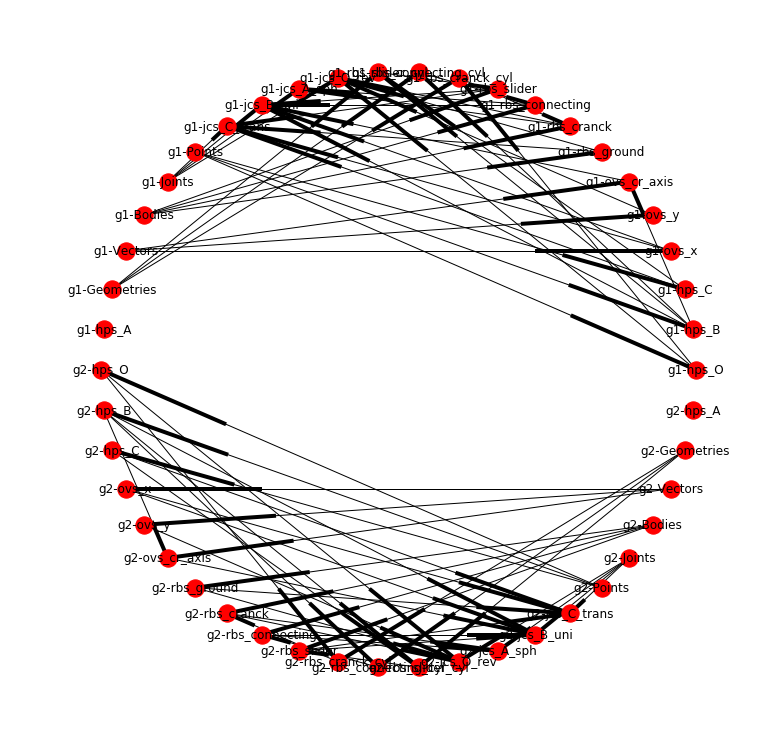

In [165]:
#g_points=g.subgraph(g.successors('Points'))
gu=nx.union(g,g,rename=('g1-','g2-'))
fig=plt.figure(figsize=(10,10))
nx.draw_circular(gu,with_labels=True)
plt.show()

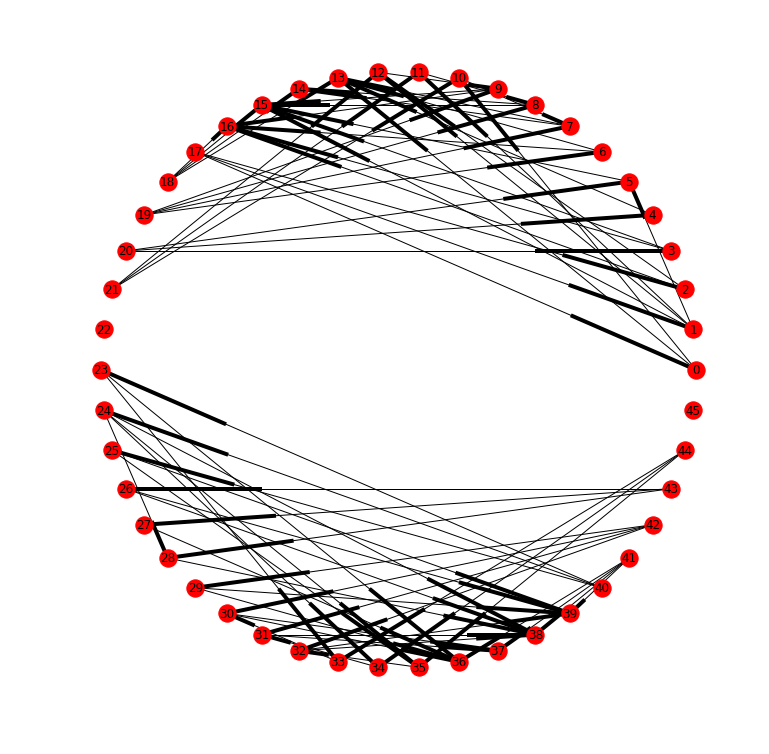

In [164]:
fig=plt.figure(figsize=(10,10))
nx.draw_circular(nx.disjoint_union(g,g),with_labels=True)
plt.show()

In [188]:
pd.Series(dict([(i,g.node[i]['obj']) for i in g.successors('Points')]))

hps_B    ([200.0], [0.0], [20.0])
hps_C    ([220.0], [0.0], [20.0])
hps_O       ([0.0], [0.0], [0.0])
dtype: object

In [30]:
import plotly
from plotly.offline import iplot
import json
from IPython import display
plotly.offline.init_notebook_mode()
    
trace = plotly.graph_objs.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])

fig = dict(data=[trace])

iplot(fig)
fig

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{'data': [{'type': 'heatmap', 'z': [[1, 20, 30], [20, 1, 60], [30, 60, 1]]}]}

In [45]:
fig = plt.figure()
x = [10, 15, 20, 25, 30]
y = [100, 250, 200, 150, 300]
plt.plot(x, y, "o")

plotly.offline.iplot_mpl(fig)

In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(True)
iplot([{'x': [1, 2, 3], 'y': [5, 2, 7]}])

In [14]:
v=(5 if 'x'=='x' else 2)

In [10]:
vector._normal('vn',m.points['hps_A'],m.points['hps_B'],m.points['hps_C'])

point object at [ 0.18438521  0.03762963  0.98213345]

In [54]:
list(m.data_graph.successors('hps_B'))

['ovs_cr_axis', 'rbs_connecting_cyl', 'rbs_slider_cyl', 'jcs_B_uni']

In [6]:
m.object_predecessors('jcs_A_sph')

Output()

In [3]:
from constraints import translational_actuator
from solvers import dds

In [8]:
slider_actuator = translational_actuator('act',m.joints['jcs_slider_ground_trans'])
slider_actuator.name

'act'

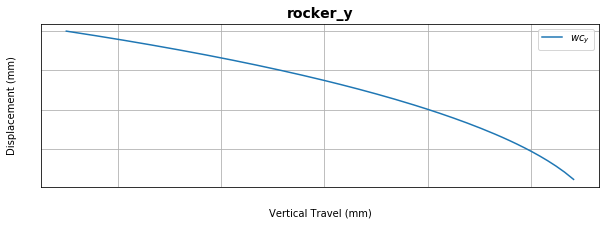

In [14]:
figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(pos_df['rbs_cranck.x'][:129],pos_df['rbs_cranck.z'][:129],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [31]:
slider_actuator = translational_actuator('act',m.joints['jcs_C_trans'])
ac = pd.Series([slider_actuator],index=['act'])
q0   = pd.concat([i.dic    for i in m.bodies])
topology_writer(m.bodies,m.joints,ac,[],'slider_crank_data_kin')
t=np.linspace(0,2*np.pi,100)
slider_actuator.pos_array=12*np.sin(t)


pos_df,vel_df,acc_df,itr=kds(m.bodies,m.joints,ac,'slider_crank_data_kin',t)


Running System Kinematic Analysis:
Progress: [                         ] 1% of 100 steps.Recalculating Jacobian
Progress: [=========================] 100% of 100 steps.

In [4]:
crank_actuator = rotational_drive('act',m.joints['jcs_O_rev'])
ac = pd.Series([crank_actuator],index=['act'])
topology_writer(m.bodies,m.joints,ac,[],'slider_crank_data_kin')
t=np.linspace(0,2*np.pi,100)
crank_actuator.pos_array=np.deg2rad(30)*np.sin(t)


pos_df,vel_df,acc_df,itr=kds(m.bodies,m.joints,ac,'slider_crank_data_kin',t)


Running System Kinematic Analysis:
Progress: [                         ] 3% of 100 steps.

E:\Main\Programming\Python\My Projects\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:224: RuntimeWarning: overflow encountered in double_scalars
  eq=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
E:\Main\Programming\Python\My Projects\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:248: RuntimeWarning: overflow encountered in double_scalars
  eq7=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
C:\Users\khale\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


Progress: [=========================] 100% of 100 steps.

In [7]:
m.joints['jcs_O_rev'].j_body.dcm.dot(m.joints['jcs_O_rev'].vji)

array([[ 0.70710678],
       [ 0.        ],
       [-0.70710678]])

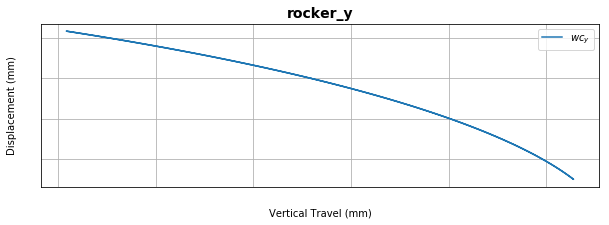

In [52]:


figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')

#plt.plot(np.rad2deg(crank_actuator.pos_array),pos_df['rbs_slider.x'][1:],label=r'$wc_{y}$')
plt.plot(pos_df['rbs_cranck.x'][1:],pos_df['rbs_cranck.z'][1:],label=r'$wc_{y}$')

plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [37]:
import sympy as sy
sy.init_printing(True)

In [38]:
t=sy.Symbol('t')
theta=sy.Function('theta')(t)
sy.cos(theta)

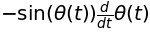

In [19]:
sy.diff(sy.cos(theta),t,1)

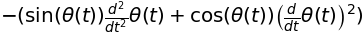

In [20]:
sy.diff(sy.cos(theta),t,2)

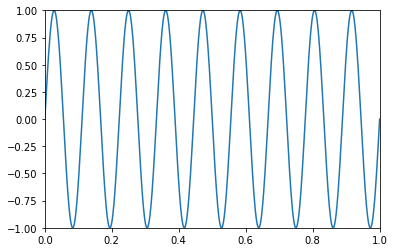

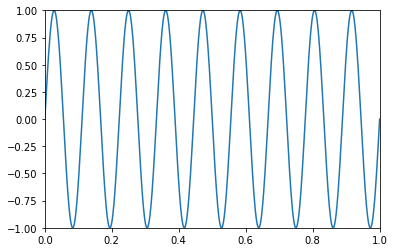

In [6]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
import time

# Create a named display
handle = display(None, display_id=True)

x = linspace(0,1,1000)
y = 0*x

fig, ax = subplots()
line, = ax.plot(x,y)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)

for k in range(1,10):
    line.set_ydata(sin(2*pi*k*x))
    # Update the named display with a new figure
    handle.update(fig)
    

In [26]:
objects_menue = widgets.Select()
objects_menue.options={'Points':dict(m.points),
                               'Vectors':dict(m.vectors),
                               'Bodies':dict(m.bodies)}
objects_menue.label=None

In [27]:
objects_menue

Select(options={'Points': {'hps_A': point object at [ 50.   0.  50.], 'hps_B': point object at [ 200.    0.   …

In [13]:
m.add_point()

In [14]:
m.add_joints()